순환 신경망(Recurrent Neural Network, RNN)  
- 입력과 출력을 시퀀스 단위로 처리하는 모델
- 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징이 있음

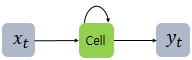  

- x는 입력층의 입력 벡터
- y는 출력층의 출력 벡터
- RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 함
- 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 함
- 은닉층의 메모리 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있음
- 현재 시점을 변수 t라고 했을때, 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임을 의미함
- 메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 함
- t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용

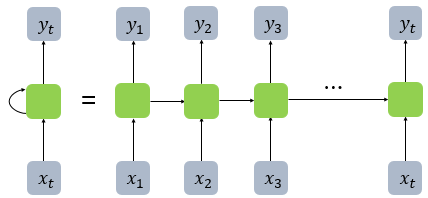  

- RNN을 표현할 때는 좌측과 같이 화살표로 사이클을 그려서 재귀 형태로 표현함
- 우측과 같이 사이클을 그리는 화살표 대신 여러 시점으로 펼쳐서 표현하기도 함
- RNN에서는 뉴런이라는 단위보다는 입력층과 출력층에서는 각각 입력 벡터와 출력 벡터, 은닉층에서는 은닉 상태라는 표현을 사용  

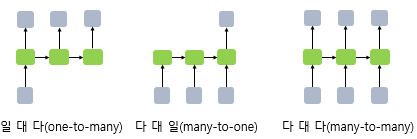  

- 입력과 출력의 길이에 따라서 달라지는 RNN의 형태가 있음.
- RNN 셀의 각 시점 별 입/출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'
- 하나의 입력에 대해서 여러개의 출력(one-to-many)의 모델은 하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 작업에 사용할 수 있음. 사진의 제목은 단어들의 나열이므로 시퀀스 출력
- 단어 시퀀스에 대해서 하나의 출력(many-to-one)을 하는 모델은 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection)에 사용할 수 있음
- 다 대 다(many-to-many)의 모델의 경우에는 입력 문장으로 부터 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기, 개체명 인식이나 품사 태깅과 같은 작업이 속함

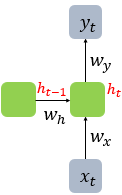  

- 현재 시점 t에서의 은닉 상태값은 $h_t$
- 은닉층의 메모리 셀은 $h_t$를 계산하기 위해서 총 두 개의 가중치를 갖게 됨.
- 하나는 입력층에서 입력값을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$ 임  
은닉층 : $h_t = tanh(W_xx_t + W_hh_{t-1}+b)$  
출력층 : $y_t = f(W_yh_t+b)$  
- $f$는 비선형 활성화 함수 중 하나
- RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해할 수 있음.
- 자연어 처리에서 RNN의 입력 $x_t$는 대부분의 경우에서 단어 벡터로 간주할 수 있는데, 단어 벡터의 차원을 d라고 하고, 은닉 상태의 크기를 $D_h$라고 하였을 때 각 벡터와 행렬의 크기는 다음과 같음  
$x_t : (d \times 1)$  
$W_x : (D_h \times d)$  
$W_h : (D_h \times D_h)$  
$h_{t-1} : (D_h \times 1)$  
$b : (D_h \times 1)$  
- 배치 크기가 1이고, d와$D_h$ 두 값 모두를 4로 가정하였을 때, RNN의 은닉층 연산을 그림으로 표현하면 아래와 같음  

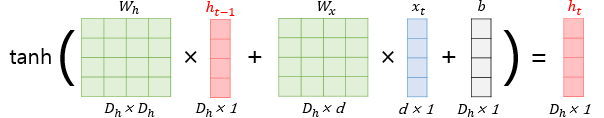  

- $h_t$를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있음
- 위의 식에서 각각의 가중치 $W_x, W_h, W_y$ 의 값은 모든 시점에서 값을 동일하게 공유함
    - 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다름
- 출력층은 결과값인 $y_t$를 계산하기 위한 활성화 함수로는 상황에 따라 다름.
    - 이진 분류 : 시그모이드 함수, 다양한 카테고리 선택 : 소프트맥스 함수

파이썬으로 RNN 구현하기

$h_t = tanh(W_xx_t + W_hh_{t-1}+b)$ 식에 대한 의사 코드

<pre>
# pseudo code
hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
# 입력 데이터의 길이 : input_length. 총 시점의 수(time steps)
# t 시점의 입력값 : input_t
for input_t in input_length:
    # 각 시점에 대해서 입력과 이전 상태의 은닉 상태를 가지고 연산
    output_t = tanh(input_t, hidden_state_t)
    # 계산 결과는 현재 시점의 은닉 상태가 됨
    hidden_state_t = output_t
</pre>

In [1]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 문장의 길이.
input_size = 4 # 입력의 차원. 보통 단어 벡터의 차원.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀 용량.

inputs = np.random.random((timesteps, input_size)) # 입력 2D 텐서

# 초기 은닉 상태는 0 벡터로 초기화
# 은닉 상태의 크기 hidden_size 로 은닉 상태를 만듦.
hidden_state_t = np.zeros((hidden_size, ))

# 8의 크기를 가지는 은닉 상태. 초기 은닉 상태는 모든 차원이 0.
print('hidden_state_t : ', hidden_state_t)

# (8, 4) 크기의 2d 텐서. 입력에 대한 가중치
Wx = np.random.random((hidden_size, input_size))
# (8, 8) 크기의 2d 텐서. 은닉 상태에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size))
# (8,) 크기의 1d 텐서. bias
b = np.random.random((hidden_size,))

print('입력 가중치 : ', np.shape(Wx)) # (은닉 상태의 크기 X 입력의 차원)
print('은닉 상태 가중치 : ', np.shape(Wh)) # (은닉 상태의 크기 X 은닉 상태의 크기)
print('편향 : ', np.shape(b)) # (은닉 상태의 크기)

total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
    # Wx * Xt + Wh * Ht + b(bias)
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
    total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태를 누적
    # 각 시점 t별 메모리 셀의 출력 크기는 (timestep, output_dim)
    print('total_hidden_states shape : ', np.shape(total_hidden_states))
    hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis=0)

print('total_hidden_states : ', total_hidden_states)

hidden_state_t :  [0. 0. 0. 0. 0. 0. 0. 0.]
입력 가중치 :  (8, 4)
은닉 상태 가중치 :  (8, 8)
편향 :  (8,)
total_hidden_states shape :  (1, 8)
total_hidden_states shape :  (2, 8)
total_hidden_states shape :  (3, 8)
total_hidden_states shape :  (4, 8)
total_hidden_states shape :  (5, 8)
total_hidden_states shape :  (6, 8)
total_hidden_states shape :  (7, 8)
total_hidden_states shape :  (8, 8)
total_hidden_states shape :  (9, 8)
total_hidden_states shape :  (10, 8)
total_hidden_states :  [[0.96655908 0.89271687 0.91860793 0.98846272 0.87119255 0.98366497
  0.98761419 0.96423603]
 [0.99989431 0.99985072 0.99855142 0.99951747 0.99983352 0.99995163
  0.99997989 0.99842238]
 [0.99995392 0.99989356 0.99948388 0.99973426 0.99991317 0.99998722
  0.99998804 0.99952474]
 [0.99991434 0.99994552 0.9994694  0.99979665 0.99984917 0.99996269
  0.9999896  0.99953338]
 [0.99995409 0.99990317 0.99955861 0.99969023 0.99987632 0.99998698
  0.99999309 0.99961467]
 [0.9999882  0.9999451  0.99968081 0.99991559 0.99994241 0.

In [2]:
# 파이토치의 nn.RNN()

import torch
import torch.nn as nn

input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

# 입력 텐서 : (배치 크기 x 시점의 수 x 매 시점마다 들어가는 입력)
# (batch_szie, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

# RNN 셀 생성
cell = nn.RNN(input_size, hidden_size, batch_first=True)
outputs, _status = cell(inputs)
print('모든 time-step의 hidden_state : ', outputs.shape)
print('최종 time-step의 hidden_state : ', _status.shape)

모든 time-step의 hidden_state :  torch.Size([1, 10, 8])
최종 time-step의 hidden_state :  torch.Size([1, 1, 8])


깊은 순환 신경망(Deep Recurrent Neural Network)  

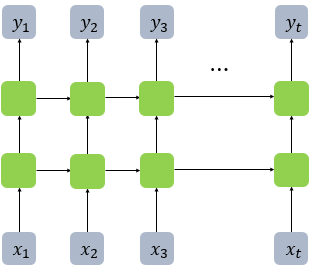  

- 순환 신경망에서 은닉층이 2개인 깊은(deep) 순환 신경망의 모습
- 깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓음

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)
outputs, _status = cell(inputs)

print('모든 time-step의 hidden_state : ', outputs.shape)
print('최종 time-step의 hidden_state : ', _status.shape) # (층 개수, 배치 크기, 은닉 상태 크기)

모든 time-step의 hidden_state :  torch.Size([1, 10, 8])
최종 time-step의 hidden_state :  torch.Size([2, 1, 8])


- 첫번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않고 마지막 층의 모든 시점의 은닉 상태
- 두번째 리턴값의 크기는 (층의 개수, 배치 크기, 은닉 상태의 크기)

양방향 순환 신경망(Bidirectional Recurrent Neural Network)  

- 양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반함

- 영어 빈칸 채우기 문제 비유
    - Exercise is very effective at [ ] belly fat.
        - 1) reducing 2) increasing 3) multiplying
    - '운동은 복부 지방을 [ ] 효과적이다'라는 영어 문장이고 정답은 reducing(줄이는 것).
    - 위의 영어 빈 칸 채우기 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족함. 목적어인 belly fat(복부 지방)를 모르는 상태라면 정답을 결정하기가 어려움
- 이전 시점의 데이터뿐만 아니라 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것

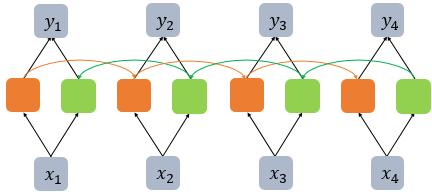  

- 양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
- 첫번째 메모리 셀은 앞에서 본 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산함. 위의 그림에서는 주황색 메모리 셀
- 두번째 메모리 셀은 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산함. 위의 그림에서는 초록색 메모리 셀. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됨

- 아래 그림은 양방향 순환 신경망에서 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습

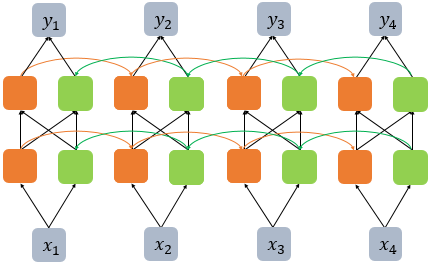  

- 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아님
- 은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 많이 필요함
- 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional에 값을 True로 전달하면 됨

In [4]:
#(batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

cell = nn.RNN(
    input_size=5, hidden_size=8, num_layers=2, batch_first=True, bidirectional=True)
outputs, _status = cell(inputs)

# (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)
print('모든 time-step의 hidden_state : ', outputs.shape)
# (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)
print('최종 time-step의 hidden_state : ', _status.shape)

모든 time-step의 hidden_state :  torch.Size([1, 10, 16])
최종 time-step의 hidden_state :  torch.Size([4, 1, 8])


- 첫번째 리턴값의 크기는 단방향 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었음
    - (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가짐. 이는 양방향의 은닉 상태 값들이 연결(concatenate) 되었기 때문
- 두번째 리턴값의 크기는 (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)를 가짐. 
    - 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값.

장단기 메모리(Long Short-Term Memory, LSTM)  

- RNN을 가장 단순한 형태의 RNN이라고 하여 바닐라 RNN(Vanilla RNN)이라고 함.(케라스에서는 SimpleRNN)
- 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있음.
    - 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생함.
    - 뒤로 갈수록 한 시점의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 전체 정보에 대한 한 시점의 영향력은 거의 의미가 없을 수 있음
- 예를 들어 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있음. 
    - 예를 들어 '모스크바에 여행을 왔는데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 해서 나는 말했지. 저 여행왔는데요. 여기 "" 입니다.' 다음 단어를 예측하기 위해서는 장소 정보가 필요함. 장소 정보에 해당되는 단어인 '모스크바'는 앞에 위치하고 있고, RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측함
    - 이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 함

바닐라 RNN 내부  

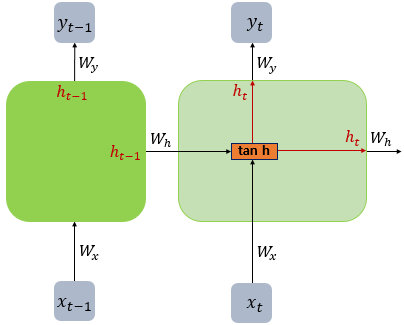  

- 바닐라 RNN은 $x_t$와 $h_{t-1}$이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 됨
- 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 됨

LSTM(Long Short-Term Memory)  

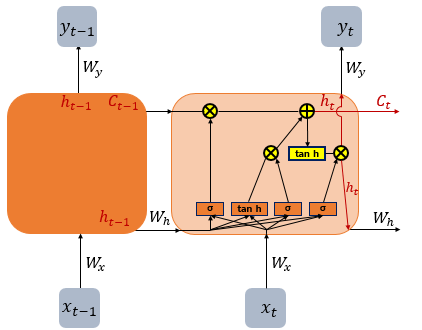  

- LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정함
- LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가함
- 위의 그림에서는 t시점의 셀 상태를 $C_t$로 표현하고 있으며, LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보임

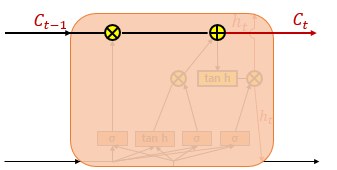  

- 셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선
- 셀 상태 또한 이전의 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됨
- 은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용함.
    - 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
    - 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재함
    - 시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절함

- 이하 식에서 σ는 시그모이드 함수
- 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수
- $W_xi, W_xg, W_xf, W_xo$는 $x_t$와 함께 각 게이트에서 사용되는 4개의 가중치
- $W_hi, W_hg, W_hf, W_ho$는 $h_{t-1}$와 함께 각 게이트에서 사용되는 4개의 가중치
- $b_i, b_g, b_f, b_o$는 각 게이트에서 사용되는 4개의 편향

(1) 입력 게이트  

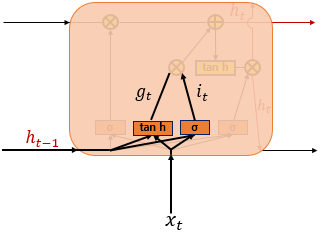  

$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$  
$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$  

- 입력 게이트는 현재 정보를 기억하기 위한 게이트
- 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 $W_{xi}$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hi}$를 곱한 값을 더하여 시그모이드 함수를 지남. $i_{t}$ 값
- 그리고 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 $W_{xi}$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hg}$를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 지남. $g_{t}$ 값
- 시그모이드 함수를 지나 0과 1 사이의 값과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값 두 개가 나오게 되는데, 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 결정함

(2) 삭제 게이트  

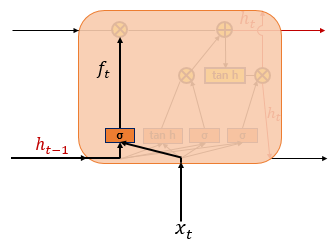  

$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$  

삭제 게이트는 기억을 삭제하기 위한 게이트입니다. 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지나게 됩니다. 시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양입니다. 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것입니다. 이를 가지고 셀 상태를 구하게 되는데, 구체적으로는 아래의 셀 상태 수식을 보면 됩니다.

(3) 셀 상태(장기 상태)  

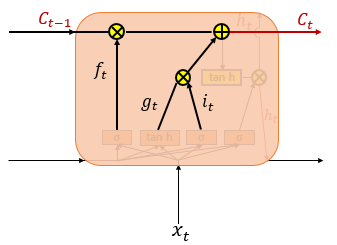  

$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$  

- 셀 상태 $C_{t}$를 LSTM에서는 장기 상태라고 부르기도 함. 삭제 게이트에서 일부 기억을 잃은 상태.
- 입력 게이트에서 구한 $i_{t}, g_{t}$ 이 두 개의 값에 대해서 원소별 곱(entrywise product)을 진행함.
    - 같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱함. 여기서는 식으로 ∘ 로 나타냄.
    - 이것이 이번에 선택된 기억할 값임
- 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더함
    - 이 값을 현재 시점 t의 셀 상태라고 하며 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨짐
- 삭제 게이트와 입력 게이트의 영향력
    - 만약 삭제 게이트의 출력값인 $f_{t}$가 0이 된다면, 이전 시점의 셀 상태값인 $C_{t-1}$은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 됨
    - 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값 $C_{t}$을 결정할 수 있음
    - 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미함
    - 반대로 입력 게이트의 값을 0이라고 한다면, 현재 시점의 셀 상태값 $C_{t}$는 오직 이전 시점의 셀 상태값 $C_{t-1}$의 값에만 의존함
    - 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미함
    - 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정함

(4) 출력 게이트와 은닉 상태(단기 상태)  

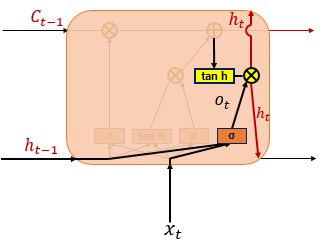  

$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$  
$h_{t}=o_{t}∘tanh(c_{t})$  

- 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값
    - 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됨
- 은닉 상태를 단기 상태라고도 함
    - 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값
    - 해당 값은 출력 게이트의 값과 연산되면서 값이 걸러지는 효과가 발생하고 단기 상태의 값은 또한 출력층으로도 향함

In [5]:
# 파이토치의 nn.LSTM()
# nn.LSTM(input_dim, hidden_size, batch_first=True)

게이트 순환 유닛(Gated Recurrent Unit, GRU)  

- GRU는 LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄임.
- GRU는 성능은 LSTM과 유사하면서 복잡했던 LSTM의 구조를 간단화 시킴
- LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재하였으나, GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재함. 
- GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만 여러 평가에서 LSTM과 비슷한 성능을 보인다고 알려짐

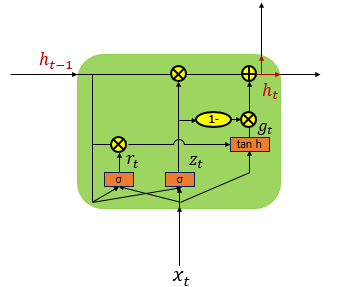  

$r_{t}=σ(W_{xr}x_{t}+W_{hr}h_{t-1}+b_{r})$  
$z_{t}=σ(W_{xz}x_{t}+W_{hz}h_{t-1}+b_{z})$  
$g_{t}=tanh(W_{hg}(r_{t}∘h_{t-1})+W_{xg}x_{t}+b_{g})$  
$h_{t}=(1-z_{t})∘g_{t}+z_{t}∘h_{t-1}$  

- GRU와 LSTM 중 어떤 것이 모델의 성능면에서 더 낫다라고 단정지어 말할 수 없으며, 기존에 LSTM을 사용하면서 최적의 하이퍼파라미터를 찾아낸 상황이라면 굳이 GRU로 바꿔서 사용할 필요는 없음
- 경험적으로 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고도 함
- GRU보다 LSTM에 대한 연구나 사용량이 더 많은데, 이는 LSTM이 더 먼저 나온 구조이기 때문

In [6]:
# 파이토치의 nn.GRU()
# nn.GRU(input_dim, hidden_size, batch_first=True)